In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [30]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [31]:
# features
X = train_values[train_values.columns[1:]]

# response
y = train_labels['heart_disease_present']

In [32]:
X = pd.get_dummies(X,drop_first=True)
for each in X.columns:
    print(each)

slope_of_peak_exercise_st_segment
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina
thal_normal
thal_reversible_defect


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs=-1)
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [38]:
acc  = random_forest.score(X_test, y_test)
acc

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8333333333333334

In [39]:
y_pred_prob = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, threasholds = roc_curve(y_test, y_pred_prob)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


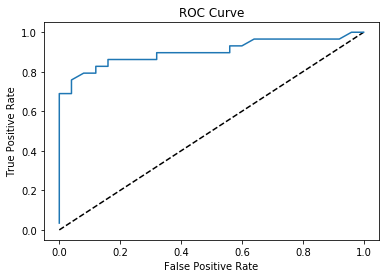

In [40]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [41]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9013793103448274


In [42]:
cv_auc = cross_val_score(random_forest, X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jo

AUC scores computed using 5-fold cross-validation: [0.8609375 0.9484375 0.96875   0.775     0.8609375]


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [17]:
test_values = pd.read_csv("test_values.csv")
test_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [18]:
X_df = test_values.drop(columns=['patient_id'])

In [19]:
X_df = pd.get_dummies(X_df,drop_first=True)

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs=-1)
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [20]:
y_pred_prob =random_forest.predict_proba(X_df)[:,1]
n = pd.Series(y_pred_prob)
n.head()

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0    0.38
1    0.13
2    0.88
3    0.15
4    0.74
dtype: float64

In [22]:
submit = pd.DataFrame({'patient)id': test_values.patient_id, 'heart_disease_present': n})
submit.head

<bound method NDFrame.head of    patient)id  heart_disease_present
0      olalu7                   0.38
1      z9n6mx                   0.13
2      5k4413                   0.88
3      mrg7q5                   0.15
4      uki4do                   0.74
5      kev1sk                   0.01
6      9n6let                   0.42
7      jxmtyg                   0.79
8      51s2ff                   0.26
9      wi9mcs                   0.00
10     741h4l                   0.35
11     1ef64a                   0.63
12     wa2ix6                   0.20
13     8167zl                   0.86
14     n6nldr                   0.14
15     ph85fp                   0.00
16     jfan5p                   0.08
17     7c4iz1                   0.29
18     ukigml                   0.86
19     flwvnq                   0.01
20     5i4fw2                   0.94
21     du1pqf                   0.09
22     vs68qz                   0.10
23     pfyez0                   0.22
24     azvkw2                   0.34
25     c

In [23]:
submit.to_csv('sub2.csv', index=False)

In [26]:
features = list(X.columns)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [27]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

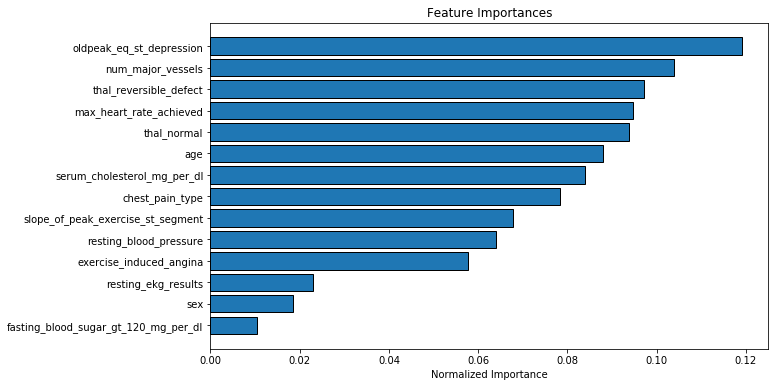

In [28]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)
